In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from random import random
from __future__ import division
from plotnine import *

#!pip3 install seaborn

from landscape_evolution import * 
from GLCM_functions import * 

In [2]:
from itertools import chain
import importlib
from NK_function import *
N=1000

entropy5 = list()
correlation5 = list()
contrast5=list()
for i in range(N):
    b = glcm_landscape_general(generateNKLandscape(6,5), levels=8, method=2)
    entropy5.append(b["entropy"])
    correlation5.append(b["correlation"])
    contrast5.append(b["contrast"])

entropy4 = list()
correlation4 = list()
contrast4=list()
for i in range(N):
    b = glcm_landscape_general(generateNKLandscape(6,4), levels=8, method=2)
    entropy4.append(b["entropy"])
    correlation4.append(b["correlation"])
    contrast4.append(b["contrast"])

entropy3 = list()
correlation3 = list()
contrast3=list()

for i in range(N):
    b = glcm_landscape_general(generateNKLandscape(6,3), levels=8, method=2)
    entropy3.append(b["entropy"])
    correlation3.append(b["correlation"])
    contrast3.append(b["contrast"])


entropy2 = list()
correlation2 = list()
contrast2=list()

for i in range(N):
    b = glcm_landscape_general(generateNKLandscape(6,2), levels=8, method=2)
    entropy2.append(b["entropy"])
    correlation2.append(b["correlation"])
    contrast2.append(b["contrast"])

    
    
entropy1 = list()
correlation1 = list()
contrast1=list()

for i in range(N):
    b = glcm_landscape_general(generateNKLandscape(6,1), levels=8, method=2)
    entropy1.append(b["entropy"])
    correlation1.append(b["correlation"])
    contrast1.append(b["contrast"])

    

entropy0 = list()
correlation0 = list()
contrast0 = list()
for i in range(N):
    b = glcm_landscape_general(generateNKLandscape(6,0), levels=8, method=2)
    entropy0.append(b["entropy"])
    correlation0.append(b["correlation"])
    contrast0.append(b["contrast"])

    


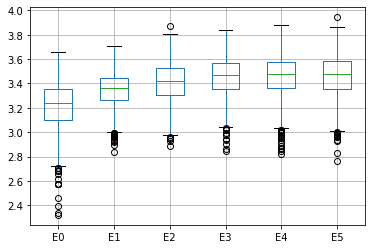

In [3]:
%matplotlib inline

# fake up some more data
entropy = {"E0":entropy0,"E1":entropy1,"E2":entropy2, "E3":entropy3, "E4":entropy4, "E5":entropy5}
correlation = {"C0":correlation0, "C1":correlation1, "C2":correlation2,"C3":correlation3, "C4":correlation4, "C5":correlation5}
contrast = {"0":contrast0,"1":contrast1,"2":contrast2, "3":contrast3, "4":contrast4, "5":contrast5}


d2 = pd.DataFrame(entropy)
d3 = pd.DataFrame(correlation)
d4 = pd.DataFrame(contrast)

#data.shape = (-1, 1)
#d2.shape = (-1, 1)
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
#data = [data, d2, d2[::2, 0]]

boxplot = d2.boxplot()


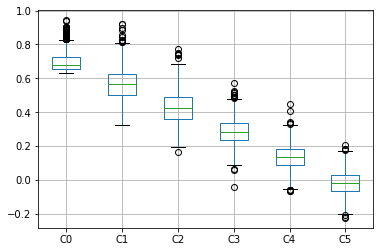

In [4]:
%matplotlib inline

boxplot2 = d3.boxplot()

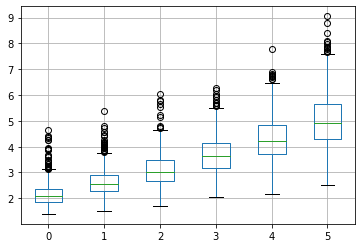

In [5]:
%matplotlib inline

boxplot2 = d4.boxplot()

In [ ]:
# *** IMPORTED PACKAGES ***b
import numpy as np
import itertools
import os # new
from time import time
import matplotlib.pyplot as plt
import random
import decimal


start = time()  # starts the clock used to measure the execution speed

# *** MODEL INPUTS ****************************************************

# NK landscape parameters -----------------------------------------
N = 16  # number of detailed decisions per lower level landscape   |
i = 100  # we will generate 1000 NK landscapes to begin with     |
# -----------------------------------------------------------------

# You can change the following variables:
which_imatrix = 1  # defines the type of an interaction matrix
                   # choose 1 for random, 2 for modular, 3 for nearly modular,
                   # 4 for diagonal, 5 for highly influential, and
                   # 6 for highly dependent, 7 local (see below)
K = 5  # only has an effect when you choose the random interaction matrix (1)
       # set to 2 for other interaction matrices


# *** GENERATING INTERACTION MATRICES ***************************************

def imatrix_rand(N=16,K=4):
    '''
    This function takes the number of N elements and K interdependencies
    and creates a random interaction matrix.
    '''
    Int_matrix_rand = np.zeros((N, N))
    for aa1 in np.arange(N):
        Indexes_1 = list(range(N))
        Indexes_1.remove(aa1)  # remove diagonal (self)
        np.random.shuffle(Indexes_1) #randomise order
        Indexes_1.append(aa1) #add self to end
        Chosen_ones = Indexes_1[-(K+1):]  # this takes the last K+1 indexes inc self
        for aa2 in Chosen_ones: #for index in random list
            Int_matrix_rand[aa1, aa2] = 1  # we turn on the interactions with K other variables
    return(Int_matrix_rand)


In [ ]:
def calc_fit(NK_land_, inter_m, Current_position, Power_key_):
    '''
    Takes the landscape and a given combination and returns a vector of fitness
    values for the vector of the N decision variables.
    '''
    Fit_vector = np.zeros(N)
    for ad1 in np.arange(N):
        Fit_vector[ad1] = NK_land_[np.sum(Current_position * inter_m[ad1]
                                          * Power_key_), ad1]
    return(Fit_vector)

In [ ]:
def glcm_landscape_simple(lscp, normalise="TRUE"):
    N = len(lscp)
    lscp_scale = np.interp(lscp, (min(lscp), max(lscp)), (0, +1))
    scale = []
    for i in range(8):
        scale.append(2*i/N)
    
    #print(N, lscp_scale, scale)

    inds = np.digitize(lscp_scale,scale)
    inds = inds-1
    #print(lscp_scale)
    #print(inds)
    hammy = np.array([0,0,0]) #generate neighbours
    for i in range(0,len(lscp)):
        for j in range(i,len(lscp)):
            ob1 = Solution()
            ham = ob1.hammingDistance(i,j)
            if ob1.hammingDistance(i,j)==1:
                hammy=np.vstack([hammy, [i, j, ham]])
            
    #print(hammy)

    hist = np.zeros((len(scale),len(scale)))

    for row in hammy:
        x,y,z=row
        hist[inds[x], inds[y]]=hist[inds[x], inds[y]]+1
    
    if (normalise=="TRUE"):
        hist = hist/(np.sum(hist))
    
    #print(hist)
    energy = np.sum(hist*hist)
    entropy=0
    contrast=0
    homogeneity=0
    
    correlation = 0
    mu = 0
    var = 0
    
    for i in range(0, len(scale)):
        for j in range(0, len(scale)):
            mu = mu + i*hist[i,j]

    
    for i in range(0, len(scale)):
        for j in range(0, len(scale)):
            var = var + hist[i,j]*(i-mu)**2
    
    myDict = {}
    for i in range(0, len(scale)):
        for j in range(0, len(scale)):
            entropy = entropy - hist[i,j]*np.log(hist[i,j]+0.00000001)
            contrast = contrast + (i-j)*(i-j)*hist[i,j]
            homogeneity = homogeneity + hist[i,j]/(1+abs(i-j))
            correlation = correlation + hist[i,j]*(i-mu)*(j-mu)/var
    
    myDict = {"energy":energy, "correlation":correlation,"entropy":entropy,"contrast":contrast, "homogeneity":homogeneity}
    #return(energy, entropy, contrast, homogeneity)
    return(myDict)

In [ ]:
N=6
i=100
Power_key = np.power(2, np.arange(N - 1, -1, -1))  # used to find addresses on the landscape
Landscape_data = np.zeros((i, 2**N, N*2+3))  # we prepare an array to receive the data

for i_1 in np.arange(i):
    '''
    Now we create the landscapes
    '''
    if which_imatrix==1:
        Int_matrix = imatrix_rand().astype(int)
    elif which_imatrix==4:  # diagonal
        '''
        The code below serves to poke three holes in the diagonal IM so that
        K=2. It is a little bit cumbersome but does the job  :-)
        Note that it only works with N=6
        '''
        Int_matrix = Int_matrix4.copy()
        id_change = random.sample(range(15), 3)
        for index in id_change:
            if index == 0:
                Int_matrix[1,0] = 0
            elif index == 1:
                Int_matrix[2,0] = 0
            elif index == 2:
                Int_matrix[2,1] = 0
            elif index == 3:
                Int_matrix[3,0] = 0
            elif index == 4:
                Int_matrix[3,1] = 0
            elif index == 5:
                Int_matrix[3,2] = 0
            elif index == 6:
                Int_matrix[4,0] = 0
            elif index == 7:
                Int_matrix[4,1] = 0
            elif index == 8:
                Int_matrix[4,2] = 0
            elif index == 9:
                Int_matrix[4,3] = 0
            elif index == 10:
                Int_matrix[5,0] = 0
            elif index == 11:
                Int_matrix[5,1] = 0
            elif index == 12:
                Int_matrix[5,2] = 0
            elif index == 13:
                Int_matrix[5,3] = 0
            elif index == 14:
                Int_matrix[5,4] = 0
    
    NK_land = np.random.rand(2**N, N)  # this is a table of random U(0,1) numbers
    # Now it is time to survey the topography of our NK landscape
    Landscape_data[i_1] = comb_and_values(NK_land, Power_key, Int_matrix)

In [ ]:
# *** GENERATING THE NK LANDSCAPES ******************************************

def gen_landscapes(i,N):
    Power_key = np.power(2, np.arange(N - 1, -1, -1))  # used to find addresses on the landscape
    Landscape_data = np.zeros((i, 2**N, N*2+3))  # we prepare an array to receive the data
    for j in range(i):
        Int_matrix = imatrix_rand().astype(int)
        NK_land = np.random.rand(2**N, N)  # this is a table of random U(0,1) numbers
        Landscape_data[j]={"NK":NK_land, "Int":Int_matrix}
    return(Landscape_data)

In [ ]:
def comb_and_values(NK_land_, Power_key_, inter_m):
    '''
    Calculates values for all combinations on the landscape. The resulting
    array contains:
    - the first columns indexed from 0 to N-1 are for each of the combinations
    - columns indexed from N to 2*N-1 are for the fit value (vector) of those combinations
    - the column indexed 2N is for the total fit (average of the entire vector)
    - column indexed 2N+1 is a dummy, with 1 indicating a local peak
    - the last column is a dummy, with 1 indicating the global peak
    '''
    Comb_and_value = np.zeros((2**N, N*2+3))  # to capture the results
    c1 = 0  # starting counter for location
    for c2 in itertools.product(range(2), repeat=N):
        # this takes time so be carefull with landscapes of bigger size
        Combination1 = np.array(c2)  # taking each combination
        fit_1 = calc_fit(NK_land_, inter_m, Combination1, Power_key_)
        Comb_and_value[c1, :N] = Combination1  # combination and values
        Comb_and_value[c1, N:2*N] = fit_1
        Comb_and_value[c1, 2*N] = np.mean(fit_1)
        c1 = c1 + 1
    for c3 in np.arange(2**N):  # now let's see if it is a local peak
        loc_p = 1  # first, assume it is
        for c4 in np.arange(N):  # check the local neighbourhood
            new_comb = Comb_and_value[c3, :N].copy().astype(int)
            new_comb[c4] = abs(new_comb[c4] - 1)
            if ((Comb_and_value[c3, 2*N] <
                 Comb_and_value[np.sum(new_comb*Power_key_), 2*N])):
                loc_p = 0  # if smaller than the neighbour, then it is not peak
        Comb_and_value[c3, 2*N+1] = loc_p
    max_ind = np.argmax(Comb_and_value[:, 2*N])
    Comb_and_value[max_ind, 2*N+2] = 1
    return(Comb_and_value)

In [ ]:
gen_landscapes(100,6)

In [ ]:
i = 1000
N = 16
master_dict = {}
for k in range(6):
    NK_land = gen_landscapes(i, N)
    temp_dict = {}
    for j in range(1000):
        temp_dict[j] = glcm_landscape_simple(NK_land[j])

In [ ]:
#Toy example
genotype = [0,0,0]
genotypes = ["00", "01", "10", "11"]
c_screen = [0.9, 0.5, 0.3, 0.7]
c_battery = [0.8,0.0, 0.0, 0.3]
c_cpu = [0.1, 0.5, 0.2, 0.9]

d_screen = dict(zip(genotypes, c_screen))
d_batter = dict(zip(genotypes, c_battery))
d_cpu = dict(zip(genotypes, c_cpu))

In [ ]:
def fitness_s(state_vec, dict_1, dict_2, dict_3):
    fitness = 0
    fitness = fitness+dict_1[str(state_vec[0])+str(state_vec[2])]
    fitness = fitness+dict_2[str(state_vec[0])+str(state_vec[1])]
    fitness = fitness+dict_3[str(state_vec[2])+str(state_vec[1])]
    fitness = fitness/len(state_vec)
    return(fitness)

In [ ]:
fitness_dict = dict()

landscape_list = []

for i in range(0,2):
    for j in range(0,2):
        for k in range(0,2):
            print(i*4+j*2+k)
            landscape_list.append(fitness_s([i,j,k], d_screen, d_batter, d_cpu))
            
landscape_list

In [ ]:
def comb_and_values(NK_land_, Power_key_, inter_m):
    '''
    Calculates values for all combinations on the landscape. The resulting
    array contains:
    - the first columns indexed from 0 to N-1 are for each of the combinations
    - columns indexed from N to 2*N-1 are for the fit value (vector) of those combinations
    - the column indexed 2N is for the total fit (average of the entire vector)
    - column indexed 2N+1 is a dummy, with 1 indicating a local peak
    - the last column is a dummy, with 1 indicating the global peak
    '''
    Comb_and_value = np.zeros((2**N, N*2+3))  # to capture the results
    c1 = 0  # starting counter for location
    for c2 in itertools.product(range(2), repeat=N):
        # this takes time so be careful with landscapes of bigger size
        Combination1 = np.array(c2)  # taking each combination
        fit_1 = calc_fit(NK_land_, inter_m, Combination1, Power_key_)
        Comb_and_value[c1, :N] = Combination1  # combination and values
        Comb_and_value[c1, N:2*N] = fit_1
        Comb_and_value[c1, 2*N] = np.mean(fit_1)
        c1 = c1 + 1
    for c3 in np.arange(2**N):  # now let's see if it is a local peak
        loc_p = 1  # first, assume it is
        for c4 in np.arange(N):  # check the local neighbourhood
            new_comb = Comb_and_value[c3, :N].copy().astype(int)
            new_comb[c4] = abs(new_comb[c4] - 1)
            if ((Comb_and_value[c3, 2*N] <
                 Comb_and_value[np.sum(new_comb*Power_key_), 2*N])):
                loc_p = 0  # if smaller than the neighbour, then it is not peak
        Comb_and_value[c3, 2*N+1] = loc_p
    max_ind = np.argmax(Comb_and_value[:, 2*N])
    Comb_and_value[max_ind, 2*N+2] = 1
    return(Comb_and_value)

In [ ]:
N=10
i = 100

#  # this is a table of random U(0,1) numbers

Power_key = np.power(2, np.arange(N - 1, -1, -1))  # used to find addresses on the landscape
Landscape_data_5 = np.zeros((i, 2**N, N*2+3))  # we prepare an array to receive the data

#Generate landscapes (no summary (yet))

for i_1 in np.arange(i):
    Int_matrix = imatrix_rand(N=10, K=5).astype(int)
    '''
    The code below serves to poke three holes in the diagonal IM so that
    K=2. It is a little bit cumbersome but does the job  :-)
    Note that it only works with N=6
    '''
    NK_land = np.random.rand(2**N, N)
    # Now it is time to survey the topography of our NK landscape
    Landscape_data_5[i_1] = comb_and_values(NK_land, Power_key, Int_matrix)


print(Power_key)
print(Int_matrix)

In [ ]:
dict_all5 = {}
for r in range(i):
    fitnesses = []
    for l in range(1024):
        fitnesses.append(Landscape_data_5[r][l][20])
    dict_all5[r]=fitnesses

In [ ]:
dicta = {}
dictb = {}
dictc = {}
dictd = {}
for valb in range(1000):
    lscp = Landscape_data_0[9][valb][10:20]
    dicta[valb]=glcm_landscape_simple(lscp)
    lscp = Landscape_data_1[9][valb][10:20]
    dictb[valb]=glcm_landscape_simple(lscp)
    lscp = Landscape_data_2[9][valb][10:20]
    dictc[valb]=glcm_landscape_simple(lscp)
    lscp = Landscape_data_5[9][valb][10:20]
    dictd[valb]=glcm_landscape_simple(lscp)

dfa = pd.DataFrame.from_dict(dicta)
dfb = pd.DataFrame.from_dict(dictb)
dfc = pd.DataFrame.from_dict(dictc)
dfd = pd.DataFrame.from_dict(dictd)



In [ ]:
dicto5a = {}
for v in range(10):
    print(v)
    dicto5a[v]=glcm_landscape_simple(list(dict_all5[v]))

dicto5a



In [ ]:

df0 = pd.DataFrame.from_dict(dicto0)
df2 = pd.DataFrame.from_dict(dicto2)
df5 = pd.DataFrame.from_dict(dicto5a)

In [ ]:
df5.iloc[0]

In [ ]:
xa = df0.iloc[0]
xb = df2.iloc[0]
xc = df5.iloc[0]
#xd = dfd.iloc[0]

ya = df0.iloc[2]
yb = df2.iloc[2]
yc = df5.iloc[2]
#xd = dfd.iloc[0]

za = df0.iloc[1]
zb = df2.iloc[1]
zc = df5.iloc[1]
#xd = dfd.iloc[0]

#bins = numpy.linspace(-10, 10, 100)

pyplot.hist(xa,alpha=0.3,label='K=0')
pyplot.hist(xb, alpha=0.5, label='K=2')
pyplot.hist(xc, alpha=0.5, label='K=5')
#pyplot.hist(xd, alpha=0.5, label='K=5')
pyplot.legend(loc='upper right')
pyplot.show()

pyplot.hist(ya, alpha=0.3, label='K=0')
pyplot.hist(yb, alpha=0.5, label='K=2')
pyplot.hist(yc, alpha=0.5, label='K=5')
#pyplot.hist(yd, alpha=0.5, label='K=5')
#pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

pyplot.hist(za, alpha=0.5, label='K=0')
pyplot.hist(zb, alpha=0.5, label='K=2')
pyplot.hist(zc, alpha=0.5, label='K=5')
#pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

pyplot.hist(zza, alpha=0.5, label='K=0')
pyplot.hist(zzb, alpha=0.5, label='K=1')
pyplot.hist(zzc, alpha=0.5, label='K=2')

#pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
pyplot.hist(zza, alpha=0.5, label='K=0')
pyplot.hist(zzb, alpha=0.5, label='K=1')
pyplot.hist(zzc, alpha=0.5, label='K=2')

#pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
Landscape_data_2[9][2][10:20]

In [ ]:
df

In [ ]:
import random
import numpy
from matplotlib import pyplot



In [ ]:
# *** CALCULATING SUMMARY STATISTICS ****************************************
number_of_peaks = np.zeros(i)
max_values = np.zeros(i)
min_values = np.zeros(i)


for i_2 in np.arange(i):
    number_of_peaks[i_2] = np.sum(Landscape_data[i_2, :, 2*N+1])
    max_values[i_2] = np.max(Landscape_data[i_2, :, 2*N])
    min_values[i_2] = np.min(Landscape_data[i_2, :, 2*N])

# Let's print some summary statistics of our sample of NK landscapes
print('Summary statistics for IMatrix: ' + str(which_imatrix) + ' K=' + str(K))
print('average number of peaks: ' + str(np.mean(number_of_peaks)))
print('maximum number of peaks: ' + str(np.max(number_of_peaks)))
print('minimum number of peaks: ' + str(np.min(number_of_peaks)))
print('average maximum value: ' + str(np.mean(max_values)))
print('average minimum value: ' + str(np.mean(min_values)))

# plot histogram of the number of local peaks in our sample
plt.figure(1, facecolor='white', figsize=(8, 6), dpi=150)  # for screens with
#          higher resolution change dpi to 150 or 200. For normal use 75.
plt.hist(number_of_peaks, bins=20, range=(1, 20), color='dodgerblue', edgecolor='black') # adjust if necessary
plt.title('Distribution of the number of peaks', size=12)
plt.xlabel('number of peaks', size=10)
plt.ylabel('frequency', size=10)


# *** SAVING THE LANDSCAPES AS A BINARY FILE FOR FUTURE RETRIEVAL

file_name = os.path.expanduser(".")  # we will save it in your home folder
if not os.path.exists(file_name + '\\NK_workshop\\'):
    os.makedirs(file_name + '\\NK_workshop\\')
np.save(file_name + '\\NK_workshop\\NK_land_type_' + str(which_imatrix) +
        '_K_' + str(K) + '_i_' + str(i) + '.npy', Landscape_data)

elapsed_time = time() - start
print('time: ' + str("%.2f" % elapsed_time) + ' sec')

# END OF LINE